In [1]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from matplotlib import pyplot as plt

In [2]:
np.random.seed(0)
number_of_features=10000
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)

In [3]:
tokenizer=Tokenizer(num_words=number_of_features)
feature_train=tokenizer.sequences_to_matrix(data_train,mode='binary')
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

In [7]:
feature_train.shape

(25000, 10000)

In [12]:
data=imdb.get_word_index()
data_sorted = {k: v for k, v in sorted(data.items(), key=lambda x: x[1],reverse=True)}
print(data_sorted)

{"'l'": 88584, "voorhees'": 88583, 'artbox': 88582, 'copywrite': 88581, "pipe's": 88580, 'wheelers': 88579, 'sics': 88578, 'transacting': 88577, 'chicatillo': 88576, 'ev': 88575, 'urrrghhh': 88574, 'airsoft': 88573, "nemesis'": 88572, "guard's": 88571, "'solve'": 88570, 'odilon': 88569, "baywatch'": 88568, 'heralding': 88567, 'lubricated': 88566, 'percival': 88565, 'reble': 88564, 'fountainhead': 88563, "olan's": 88562, 'amitabhs': 88561, 'contradictors': 88560, 'wight': 88559, "bearings'": 88558, 'lederer': 88557, "'half": 88556, 'expeditious': 88555, 'maize': 88554, 'slahsers': 88553, "mariner's": 88552, "'hall": 88551, 'unoticeable': 88550, 'fitzgibbon': 88549, 'intercontenital': 88548, 'empahh': 88547, 'daud': 88546, 'swinginest': 88545, 'thoroughfare': 88544, 'pensaba': 88543, 'miniskirts': 88542, 'uneffective': 88541, 'catepillar': 88540, 'dubbers': 88539, 'sequency': 88538, 'beguine': 88537, 'isolytic': 88536, 'ending\x97in': 88535, "one''willard'": 88534, 'losted': 88533, 'praa

In [9]:
help(imdb)

Help on module keras.datasets.imdb in keras.datasets:

NAME
    keras.datasets.imdb - IMDB sentiment classification dataset.

FUNCTIONS
    get_word_index(path='imdb_word_index.json')
        Retrieves a dict mapping words to their index in the IMDB dataset.
        
        Args:
            path: where to cache the data (relative to `~/.keras/dataset`).
        
        Returns:
            The word index dictionary. Keys are word strings, values are their index.
        
        Example:
        
        ```python
        # Retrieve the training sequences.
        (x_train, _), _ = keras.datasets.imdb.load_data()
        # Retrieve the word index file mapping words to indices
        word_index = keras.datasets.imdb.get_word_index()
        # Reverse the word index to obtain a dict mapping indices to words
        inverted_word_index = dict((i, word) for (word, i) in word_index.items())
        # Decode the first sequence in the dataset
        decoded_sequence = " ".join(inverted_w

In [8]:
data_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
network=models.Sequential()
network.add(layers.Dense(units=16,activation='relu',input_shape=(10000,)))
network.add(layers.Dense(units=16,activation='relu'))
network.add(layers.Dense(units=1, activation="sigmoid"))

In [ ]:
network.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics='accuracy')
network.summary()

In [ ]:
history = network.fit(feature_train, # Features
 target_train, # Target vector
epochs=15, # Number of epochs
 # No output
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data

In [ ]:
predicted_target = network.predict(features_test)

In [8]:
training_loss=history.history['loss']
test_loss=history.history['val_loss']

In [9]:
epoch_count = range(1, len(training_loss) + 1)

Text(0.5, 0, 'Epoch')

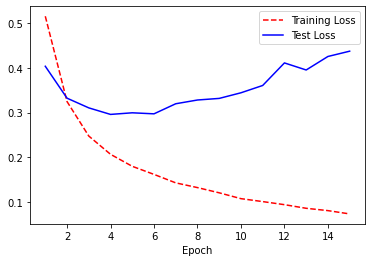

In [10]:
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")

In [12]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

In [13]:
np.random.seed(0)

In [14]:
number_of_features=100

In [15]:
feature,target=make_classification(n_samples=1000,n_features=number_of_features,n_informative=3,n_classes=2,weights=[.5,.5],random_state=0)

In [38]:
def create_network(optimizer='rmsprop'):
    network=models.Sequential()
    network.add(layers.Dense(units=16,activation='relu',input_shape=(number_of_features,)))
    network.add(layers.Dense(units=16,activation='relu'))
    network.add(layers.Dense(units=1,activation='sigmoid'))
    network.compile(loss='binary_crossentropy',
                   optimizer=optimizer,
                   metrics=['accuracy'])
    return network

In [39]:
neural_network=KerasClassifier(build_fn=create_network)

C:\Users\Hendrik\AppData\Local\Temp\ipykernel_23356\2756930012.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network=KerasClassifier(build_fn=create_network)


In [40]:
epochs=[5,10]
batches=[5,10,100]
optimizer=['rmsprop','adam']

In [41]:
hyperparams=dict(optimizer=optimizer,epochs=epochs,batch_size=batches)

In [42]:
grid=GridSearchCV(estimator=neural_network,param_grid=hyperparams)

In [43]:
grid_result=grid.fit(feature,target)

Epoch 1/5
160/160 [==============================] - 0s 617us/step - loss: 0.7284 - accuracy: 0.5063
Epoch 2/5
160/160 [==============================] - 0s 598us/step - loss: 0.6379 - accuracy: 0.6325
Epoch 3/5
160/160 [==============================] - 0s 598us/step - loss: 0.5667 - accuracy: 0.7125
Epoch 4/5
160/160 [==============================] - 0s 604us/step - loss: 0.4948 - accuracy: 0.7600
Epoch 5/5
40/40 [==============================] - 0s 590us/step - loss: 0.5201 - accuracy: 0.7100
Epoch 1/5
160/160 [==============================] - 0s 611us/step - loss: 0.7030 - accuracy: 0.5788
Epoch 2/5
160/160 [==============================] - 0s 604us/step - loss: 0.5843 - accuracy: 0.6888
Epoch 3/5
160/160 [==============================] - 0s 611us/step - loss: 0.5041 - accuracy: 0.7400
Epoch 4/5
160/160 [==============================] - 0s 598us/step - loss: 0.4398 - accuracy: 0.7987
Epoch 5/5
40/40 [==============================] - 0s 590us/step - loss: 0.6581 - accuracy: 0

160/160 [==============================] - 0s 642us/step - loss: 0.4205 - accuracy: 0.8200
Epoch 6/10
160/160 [==============================] - 0s 642us/step - loss: 0.3666 - accuracy: 0.8487
Epoch 7/10
160/160 [==============================] - 0s 636us/step - loss: 0.3174 - accuracy: 0.8775
Epoch 8/10
160/160 [==============================] - 0s 636us/step - loss: 0.2733 - accuracy: 0.8988
Epoch 9/10
160/160 [==============================] - 0s 642us/step - loss: 0.2305 - accuracy: 0.9200
Epoch 10/10
40/40 [==============================] - 0s 590us/step - loss: 0.6017 - accuracy: 0.7450
Epoch 1/5
80/80 [==============================] - 0s 621us/step - loss: 0.7284 - accuracy: 0.5088
Epoch 2/5
80/80 [==============================] - 0s 595us/step - loss: 0.6608 - accuracy: 0.6112
Epoch 3/5
80/80 [==============================] - 0s 608us/step - loss: 0.6069 - accuracy: 0.6737
Epoch 4/5
80/80 [==============================] - 0s 608us/step - loss: 0.5554 - accuracy: 0.7337
Epoc

20/20 [==============================] - 0s 579us/step - loss: 0.6116 - accuracy: 0.6950
Epoch 1/10
80/80 [==============================] - 0s 659us/step - loss: 0.6770 - accuracy: 0.5875
Epoch 2/10
80/80 [==============================] - 0s 633us/step - loss: 0.5978 - accuracy: 0.6837
Epoch 3/10
80/80 [==============================] - 0s 646us/step - loss: 0.5401 - accuracy: 0.7387
Epoch 4/10
80/80 [==============================] - 0s 646us/step - loss: 0.4871 - accuracy: 0.7750
Epoch 5/10
80/80 [==============================] - 0s 659us/step - loss: 0.4386 - accuracy: 0.8025
Epoch 6/10
80/80 [==============================] - 0s 633us/step - loss: 0.3954 - accuracy: 0.8275
Epoch 7/10
80/80 [==============================] - 0s 646us/step - loss: 0.3562 - accuracy: 0.8450
Epoch 8/10
80/80 [==============================] - 0s 633us/step - loss: 0.3190 - accuracy: 0.8675
Epoch 9/10
80/80 [==============================] - 0s 633us/step - loss: 0.2843 - accuracy: 0.8863
Epoch 10/10

8/8 [==============================] - 0s 858us/step - loss: 0.6725 - accuracy: 0.5738
Epoch 8/10
8/8 [==============================] - 0s 715us/step - loss: 0.6561 - accuracy: 0.6087
Epoch 9/10
8/8 [==============================] - 0s 858us/step - loss: 0.6417 - accuracy: 0.6313
Epoch 10/10
2/2 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.5650
Epoch 1/10
8/8 [==============================] - 0s 858us/step - loss: 0.8825 - accuracy: 0.4775
Epoch 2/10
8/8 [==============================] - 0s 1ms/step - loss: 0.8020 - accuracy: 0.4700
Epoch 3/10
8/8 [==============================] - 0s 715us/step - loss: 0.7519 - accuracy: 0.4737
Epoch 4/10
8/8 [==============================] - 0s 858us/step - loss: 0.7239 - accuracy: 0.5038
Epoch 5/10
8/8 [==============================] - 0s 858us/step - loss: 0.7031 - accuracy: 0.5275
Epoch 6/10
8/8 [==============================] - 0s 858us/step - loss: 0.6890 - accuracy: 0.5600
Epoch 7/10
8/8 [==================

In [47]:
help(grid_result)

Help on GridSearchCV in module sklearn.model_selection._search object:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either es

In [52]:
import pandas as pd
df=pd.DataFrame(grid_result.cv_results_)

In [55]:
df.index=df['param_optimizer']

In [66]:
df.iloc[:,8:12]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score
param_optimizer,,,,
rmsprop,0.710,0.685,0.660,0.650
adam,0.740,0.640,0.650,0.735
rmsprop,0.745,0.705,0.680,0.700
adam,0.755,0.715,0.700,0.680
rmsprop,0.615,0.635,0.640,0.665
adam,0.695,0.680,0.640,0.645
rmsprop,0.750,0.730,0.675,0.720
adam,0.685,0.700,0.685,0.695
rmsprop,0.535,0.550,0.450,0.520


In [68]:
df.index=df['param_batch_size']

In [75]:
df.iloc[:,8:]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_epochs,,,,,,,,
5,0.710,0.685,0.660,0.650,0.680,0.677,0.020881,6
5,0.740,0.640,0.650,0.735,0.725,0.698,0.043658,5
10,0.745,0.705,0.680,0.700,0.670,0.700,0.025884,4
10,0.755,0.715,0.700,0.680,0.745,0.719,0.027821,1
5,0.615,0.635,0.640,0.665,0.655,0.642,0.017205,8
5,0.695,0.680,0.640,0.645,0.660,0.664,0.020833,7
10,0.750,0.730,0.675,0.720,0.660,0.707,0.034000,3
10,0.685,0.700,0.685,0.695,0.775,0.708,0.034000,2
5,0.535,0.550,0.450,0.520,0.530,0.517,0.034871,12


In [72]:
df.index=df['param_epochs']

In [73]:
df.iloc[:,8:12]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score
param_epochs,,,,
5,0.710,0.685,0.660,0.650
5,0.740,0.640,0.650,0.735
10,0.745,0.705,0.680,0.700
10,0.755,0.715,0.700,0.680
5,0.615,0.635,0.640,0.665
5,0.695,0.680,0.640,0.645
10,0.750,0.730,0.675,0.720
10,0.685,0.700,0.685,0.695
5,0.535,0.550,0.450,0.520


In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

In [3]:
network2 = models.Sequential()
# Add fully connected layer with a ReLU activation function
network2.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))
# Add fully connected layer with a ReLU activation function
network2.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network2.add(layers.Dense(units=1, activation="sigmoid"))
# Visualize network architecture

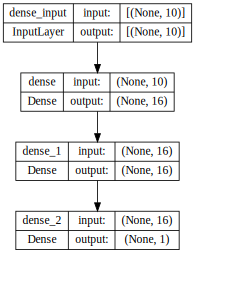

In [10]:
SVG(model_to_dot(network2, show_shapes=True,dpi=60).create(prog="dot", format="svg"))

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [4]:
from keras.datasets import mnist

In [12]:
K.set_image_data_format("channels_first")

In [5]:
(data_train, target_train), (data_test, target_test) = mnist.load_data()

In [6]:
channel=1
height=28
width=28

In [7]:
data_train = data_train.reshape(data_train.shape[0], height, width, channel)

In [8]:
data_test = data_test.reshape(data_test.shape[0], height, width,channel)

In [9]:
feature_train=data_train/255
feature_test=data_test/255

In [10]:
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [11]:
number_of_classes

10

In [13]:
network = Sequential()
# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
 kernel_size=(5, 5),
 input_shape=( width, height,channel),
 activation='relu'))
# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropout layer
network.add(Dropout(0.5))
# Add layer to flatten input
network.add(Flatten())
# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))
# Add dropout layer
network.add(Dropout(0.5))
# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

In [14]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                      

In [3]:
SVG(model_to_dot(network, show_shapes=True,dpi=70).create(prog="dot", format="svg"))

NameError: name 'network' is not defined

In [18]:
network.compile(loss="categorical_crossentropy", # Cross-entropy
 optimizer="rmsprop", # Root Mean Square Propagation
 metrics=["accuracy"]) # Accuracy performance metric

In [25]:
# Train neural network
network.fit(
    feature_train,
    target_train,
 epochs=3, # Number of epochs
 verbose=1, # Don't print description after each epoch
 batch_size=100, # Number of observations per batch
    validation_data=(feature_test, target_test)) # Data for evaluatio
  # Data for evaluation

Epoch 1/3
600/600 [==============================] - 17s 29ms/step - loss: 0.0659 - accuracy: 0.9806 - val_loss: 0.0399 - val_accuracy: 0.9869
Epoch 2/3
600/600 [==============================] - 17s 29ms/step - loss: 0.0643 - accuracy: 0.9816 - val_loss: 0.0410 - val_accuracy: 0.9870
Epoch 3/3
600/600 [==============================] - 17s 29ms/step - loss: 0.0672 - accuracy: 0.9816 - val_loss: 0.0401 - val_accuracy: 0.9871


In [17]:
from tensorflow.keras.preprocessing import sequence
from keras import layers

In [14]:
number_of_features = 1000

In [15]:
(data_train, target_train), (data_test, target_test) = imdb.load_data(
 num_words=number_of_features)

In [16]:
features_train = sequence.pad_sequences(data_train, maxlen=400)
features_test = sequence.pad_sequences(data_test, maxlen=400)

In [19]:
network = models.Sequential()
# Add an embedding layer
network.add(layers.Embedding(input_dim=number_of_features, output_dim=128))
# Add a long short-term memory layer with 128 units
network.add(layers.LSTM(units=128))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid"))
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy
                optimizer="Adam", # Adam optimization
 metrics=["accuracy"]) # Accuracy performance metric

In [21]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         128000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 259,713
Trainable params: 259,713
Non-trainable params: 0
_________________________________________________________________


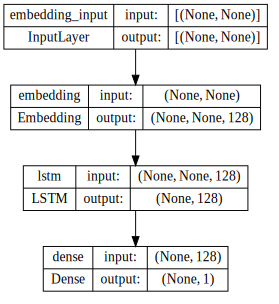

In [22]:
SVG(model_to_dot(network, show_shapes=True,dpi=70).create(prog="dot", format="svg"))

In [23]:
history = network.fit(features_train, # Features
 target_train, # Target
epochs=3, # Number of epochs
 verbose=1, # Do not print description after each epoch
 batch_size=1000, # Number of observations per batch
 validation_data=(features_test, target_test)) # Test data

Epoch 1/3
25/25 [==============================] - 140s 5s/step - loss: 0.6809 - accuracy: 0.5884 - val_loss: 0.6632 - val_accuracy: 0.6286
Epoch 2/3
25/25 [==============================] - 129s 5s/step - loss: 0.6270 - accuracy: 0.6997 - val_loss: 0.5343 - val_accuracy: 0.7501
Epoch 3/3
25/25 [==============================] - 144s 6s/step - loss: 0.4571 - accuracy: 0.7895 - val_loss: 0.4073 - val_accuracy: 0.8211
